In [9]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
class SIR:
    def __init__(self, eons=1000, Susceptible=950, Infected=50, Resistant=0, rateSI=0.05, rateIR=0.01):
        self.eons = eons
        self.Susceptible = Susceptible
        self.Infected = Infected
        self.Resistant = Resistant
        self.rateSI = rateSI
        self.rateIR = rateIR
        self.numIndividuals = Susceptible + Infected + Resistant
        self.results = None
        self.modelRun = False

    def run(self):
        Susceptible = [self.Susceptible]
        Infected = [self.Infected]
        Resistant = [self.Resistant]

        for step in range(1, self.eons):
            S_to_I = (self.rateSI * Susceptible[-1] * Infected[-1]) / self.numIndividuals
            I_to_R = Infected[-1] * self.rateIR
            Susceptible.append(Susceptible[-1] - S_to_I)
            Infected.append(Infected[-1] + S_to_I - I_to_R)
            Resistant.append(Resistant[-1] + I_to_R)

        self.results = pd.DataFrame.from_dict({'Time':list(range(len(Susceptible))),
            'Susceptible':Susceptible, 'Infected':Infected, 'Resistant':Resistant},
            orient='index').transpose()
        self.modelRun = True

    def plot(self):
        if self.modelRun == False:
            print('Error: Model has not run. Please call SIR.run()')
            return
        plt.plot(self.results['Time'], self.results['Susceptible'], color='blue')
        plt.plot(self.results['Time'], self.results['Infected'], color='red')
        plt.plot(self.results['Time'], self.results['Resistant'], color='green')
        plt.xlabel('Time')
        plt.ylabel('Population')
        plt.legend(['Susceptible','Infected','Resistant'], prop={'size': 10}, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=3, fancybox=True, shadow=True)
        plt.title(r'$\beta = {0}, \gamma = {1}$'.format(self.rateSI, self.rateIR))
        plt.savefig('test.png')
        plt.close()

OSError: [Errno 30] Read-only file system: '/test.png'

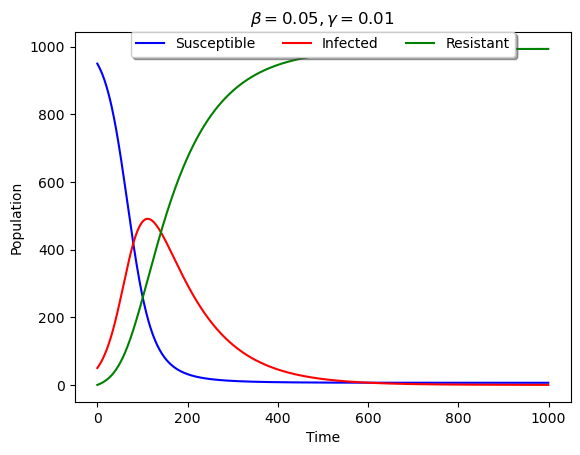

In [8]:
m = SIR()
m.run()
m.plot()